In [204]:
%matplotlib inline

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
grants = pd.read_csv("DiscGrants96to13.csv", encoding = "ISO-8859-1")
grants["Latitude"].fillna(0, inplace=True)
grants["Longitude"].fillna(0, inplace=True)
grants.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [207]:
programs = pd.DataFrame(grants["Program"])
stats = programs.stack().value_counts()
stats

Native American Library Service    2681
Museum Assessment Program          1731
Museums for America                1673
Conservation Assessment Prog.      1397
General Operating Support          1299
Conservation Program               1121
Native American Basic Grants        846
National Leadership Grants          810
Librarians for the 21st Century     388
Native American Native Hawaiian     220
Native Amer. Tech. Assistance       198
Learning Opportunities Grants       168
Professional Practices              102
National Leadership Grants (LL)      97
Museum Grants African American       91
Save America's Treasures             71
21st Century Museum Professiona      64
Museum Leadership Initiatives        57
Native Am. Enhancement Grants        51
NLG/Museum Library Collab            30
NLG/Preserv or Digitization          29
NLG/Education and Training           23
National Leadership Grants - Mu      18
NLG/Research and Demo                17
NLG/Technology & Mus. On Line        13


In [208]:
stats.dtype

dtype('int64')

In [210]:
list(grants)

['LogNumber',
 'Institution',
 'Program',
 'ProgramType',
 'ProjectTitle',
 'ProjectType',
 'AwardDate',
 'InstAddr1',
 'InstAddr2',
 'InstAddr3',
 'InstCity',
 'InstState',
 'InstZip',
 'AwardOrig',
 'AwardTotal',
 'AppMatchAmount',
 'ReqAwardAmount',
 'ReqMatchAmount',
 'Prefix',
 'FirstName',
 'LastName',
 'OrgType',
 'FiscalYear',
 'AwardPeriodFr',
 'AwardPeriodTo',
 'OrgUnit',
 'OUAddr1',
 'OUAddr2',
 'OUAddr3',
 'OUCity',
 'OUState',
 'OUZip',
 'Latitude',
 'Longitude',
 'FIPSState',
 'FIPSCounty',
 'CensusTract',
 'CensusBlock',
 'FIPSMCDCode',
 'FIPSPlaceCode',
 'CBSACode',
 'MetroDivisionCode',
 'Description']

In [211]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Let's get the number of grants per state.

In [212]:
def f(state):
    df = grants.loc[grants['InstState'] == state]
    return len(df.index)

In [213]:
grants['InstState'].unique()

array(['AK', 'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'AR', 'IA', 'ND', 'RI', 'DE', 'LA', 'WY', 'VI', 'GU',
       'AS', nan, 'FM', 'PW', 'MH'], dtype=object)

In [214]:
all_states = ['AK', 'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'AR', 'IA', 'ND', 'RI', 'DE', 'LA', 'WY', 'VI', 'GU',
       'AS', 'FM', 'PW', 'MH']

In [215]:
interact(f, state=all_states);

948

In [216]:
grants["AwardDate"].dtype

dtype('O')

Now the number of grants by year, but first there is some dirty data we have to clean.

In [217]:
grants['date'] = pd.to_datetime(grants['AwardDate'])
grants['year'], grants['month'], grants['day'] = grants['date'].dt.year, grants['date'].dt.month, grants['date'].dt.day
grants['year'] = grants['year'].fillna(0.0).astype(int)
grants['month'] = grants['month'].fillna(0.0).astype(int)
grants['day'] = grants['day'].fillna(0.0).astype(int)

Here is the number of grants by year.

In [218]:
def g(year):
    df = grants.loc[grants['year'] == year]
    return len(df.index)

In [219]:
interact(g, year=(2000, 2013));

577

We can get the programs with the highest number of grants for any given year.

In [220]:
def h(year, count):
    grants2 = grants.loc[grants['year'] == year]
    program_stats = grants2.groupby('Program').count()
    #program_stats = grants.groupby('Program')['LogNumber'].nlargest(5)
    #program_stats
    df1 = program_stats[['LogNumber']]
    # df1.plot()
    df1 = df1.reset_index()
    df2 = df1.sort_values(by='LogNumber', ascending=False)
    df3 = df2.head(count)
    df3 = df3.reset_index(drop=True)
    df3.columns = ['Program', 'Number of grants']
    return df3

In [221]:
interact(h, year=(2000, 2013), count = 5);

,Program,Number of grants
0,Native American Library Service,228
1,Museums for America,176
2,National Leadership Grants,53
3,Conservation Program,40
4,Librarians for the 21st Century,35


We can show on the map where the grants are for, based on the state we choose.

In [222]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

def ff(state):
    
    
    if state == "":
        return
    
    df = grants.loc[grants['InstState'] == state]
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    
    df = df.head()

    grants_lat = df["Latitude"]
    grants_lon = df["Longitude"]

    #np.nan_to_num(grants_lat)
    #np.nan_to_num(grants_lon)

    #df3 = df2.head(5)
    ax.plot(grants_lon, grants_lat, marker = '.', transform = ccrs.PlateCarree())


    plt.show()

In [223]:
all_states = ['AK', 'AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'AR', 'IA', 'ND', 'RI', 'DE', 'LA', 'WY', 'VI', 'GU',
       'AS', 'FM', 'PW', 'MH']

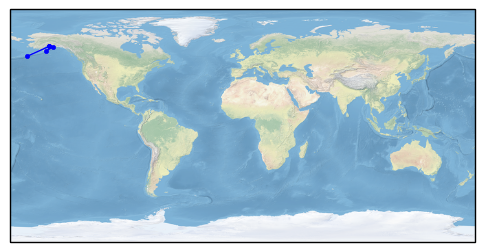

In [224]:
interact(ff, state=all_states);